# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### load train, test dataset using Pandas

In [3]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [4]:
train.head(80)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
..          ...       ...     ...   
50           51         0       3   
51           52         0       3   
52           53         1       1   
53           54         1       2   
54           55         0       1   
55           56         1       1   
56           57         1       2   
57           58         0       3   
58           59         1       2   
59           60         0       3   
60           61         0       3   
61           62         1       1   
62           63         0       1   
63           64         0       3   
64           65         0       1   
65           66         1       3   
66           67         1       2   
67           68         0       3   
68           69         1       3   
69           70         0       3   
70           71         0       2   
71           72         0       3   
72           73         0       2   
73           74         0       3   
74           75         1       3   
75           76         0       3   
76           77         0       3   
77           78         0       3   
78           79         1       2   
79           80         1       3   

                                                 Name     Sex    Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.00      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                              Heikkinen, Miss. Laina  female  26.00      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                            Allen, Mr. William Henry    male  35.00      0   
5                                    Moran, Mr. James    male    NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.00      0   
7                      Palsson, Master. Gosta Leonard    male   2.00      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.00      1   
11                           Bonnell, Miss. Elizabeth  female  58.00      0   
12                     Saundercock, Mr. William Henry    male  20.00      0   
13                        Andersson, Mr. Anders Johan    male  39.00      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                               Rice, Master. Eugene    male   2.00      4   
17                       Williams, Mr. Charles Eugene    male    NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.00      1   
19                            Masselmani, Mrs. Fatima  female    NaN      0   
20                               Fynney, Mr. Josep

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [15]:
bar_chart('Sex')

In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

The Chart confirms **Women** more likely survivied than **Men**

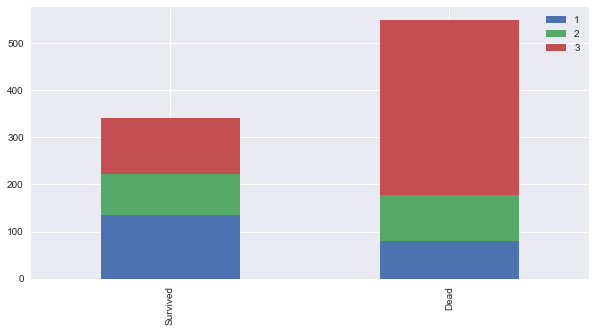

In [17]:
bar_chart('Pclass')

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

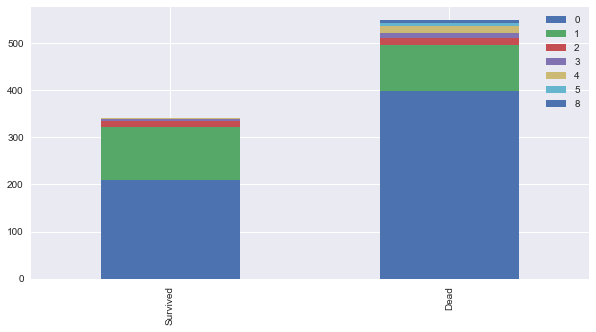

In [19]:
bar_chart('SibSp')

In [20]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

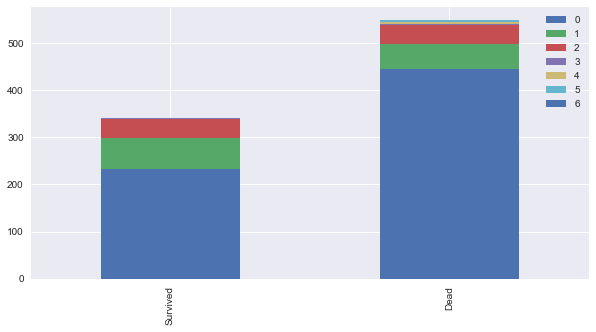

In [21]:
bar_chart('Parch')

In [22]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

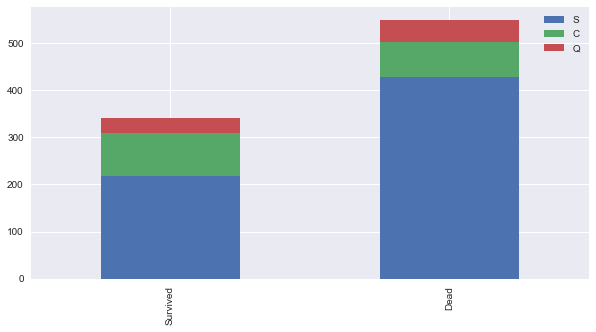

In [23]:
bar_chart('Embarked')

In [24]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [25]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [26]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [27]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### 4.2 Name

In [28]:
train_test_data = [train, test] # combining train and test dataset

#Extract Title feature using regular expressions. 
#The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Sir           1
Countess      1
Jonkheer      1
Capt          1
Don           1
Ms            1
Lady          1
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [32]:
pd.crosstab(train['Title'], train['Sex']).T.style.background_gradient(cmap='summer_r')

In [33]:
pd.crosstab(test['Title'], test['Sex']).T.style.background_gradient(cmap='summer_r')

In [34]:
pd.crosstab(train['Title'], train['Age']).T.style.background_gradient(cmap='summer_r')

In [35]:
# title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
#                  "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
#                  "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

#### Title map
Ms: 0  Miss: 1  Master: 2  Mr: 3

In [36]:
title_mapping = {"Ms":0, "Mrs":0, "Lady":0, "Mlle":0, "Countess":0,
                 "Miss":1,
                 "Master":2, 
                 "Mr":3, "Sir": 3, "Capt":3, "Mme":3, "Dr":3, "Rev":3, 
                 "Col":3, "Major":3, "Jonkheer":3, "Don":3, "Dona":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      3  
1      0          PC 17599  71.2833   C85        C      0  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      0  
4      0            373450   8.0500   NaN        S      3

In [38]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      3  
1  47.0      1      0   363272   7.0000   NaN        S      0  
2  62.0      0      0   240276   9.6875   NaN        Q      3  
3  27.0      0      0   315154   8.6625   NaN        S      3  
4  22.0      1      1  3101298  12.2875   NaN        S      0

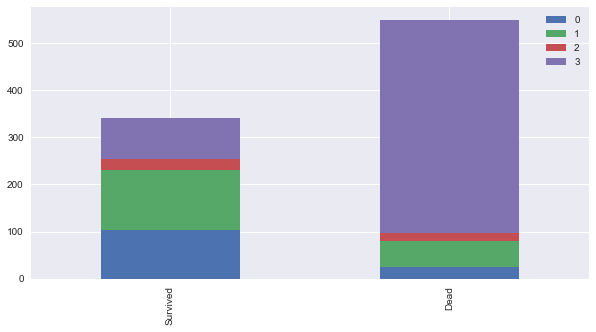

In [39]:
bar_chart('Title')

In [40]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [41]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      3  
1          PC 17599  71.2833   C85        C      0  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      0  
4            373450   8.0500   NaN        S      3

In [42]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      3  
1        S      0  
2        Q      3  
3        S      3  
4        S      0

### 4.3 Sex

male: 0
female: 1

In [43]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

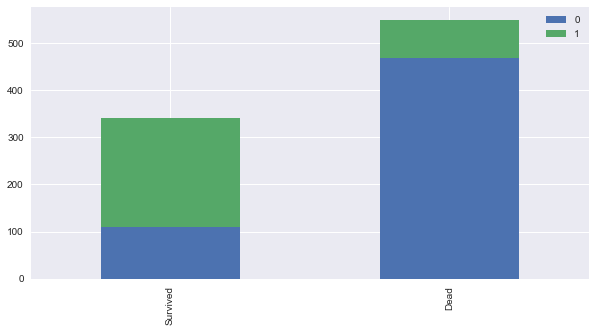

In [44]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [45]:
train.head(10)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   
5            6         0       3    0   NaN      0      0            330877   
6            7         0       1    0  54.0      0      0             17463   
7            8         0       3    0   2.0      3      1            349909   
8            9         1       3    1  27.0      0      2            347742   
9           10         1       2    1  14.0      1      0            237736   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      3  
1  71.2833   C85        C      0  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      0  
4   8.0500   NaN        S      3  
5   8.4583   NaN        Q      3  
6  51.8625   E46        S      3  
7  21.0750   NaN        S      2  
8  11.1333   NaN        S      0  
9  30.0708   NaN        C      0

In [46]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [47]:
# train.groupby("Title")["Age"].transform("median")

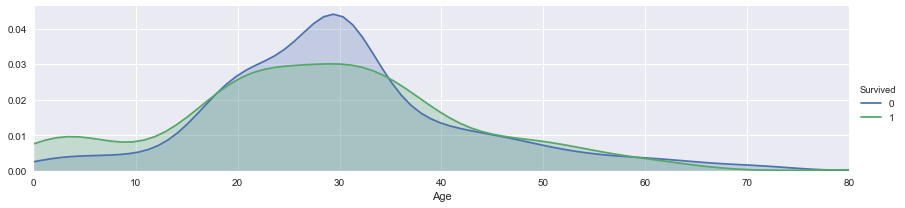

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

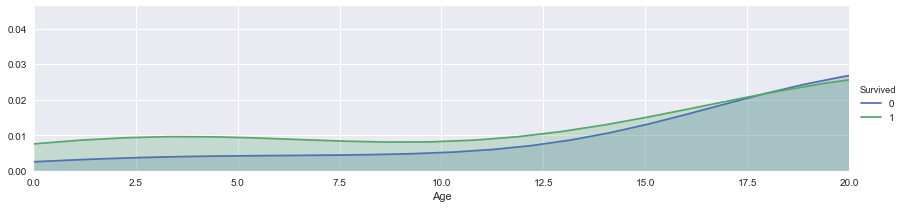

In [49]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20) #調整範圍再局部觀察

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [52]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.326693
2  (32.252, 48.168]  0.439024
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909

In [53]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 64), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [54]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title           AgeBand  
0   7.2500   NaN        S      3  (16.336, 32.252]  
1  71.2833   C85        C      0  (32.252, 48.168]  
2   7.9250   NaN        S      1  (16.336, 32.252]  
3  53.1000  C123        S      0  (32.252, 48.168]  
4   8.0500   NaN        S      3  (32.252, 48.168]

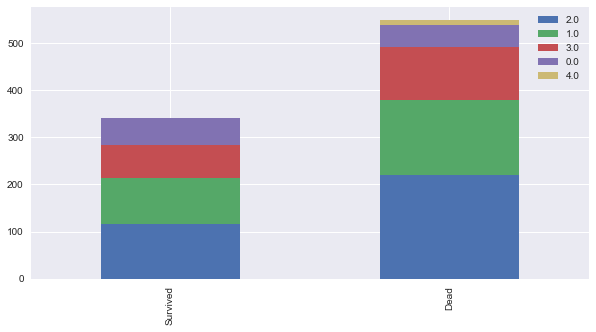

In [55]:
bar_chart('Age')

In [56]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Age  Survived
0  0.0  0.548077
3  3.0  0.385870
1  1.0  0.380392
2  2.0  0.344214
4  4.0  0.090909

In [57]:
train.drop('AgeBand', axis=1, inplace=True)

### 4.5 Embarked

#### 4.5.1 filling missing values

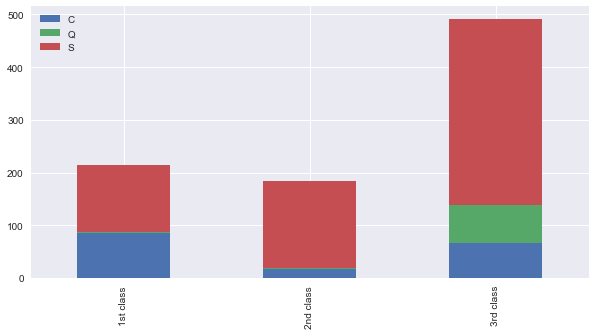

In [58]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [59]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [60]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      3  
1  71.2833   C85        C      0  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      0  
4   8.0500   NaN        S      3

In [61]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [62]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
1         1  0.553571
2         2  0.389610
0         0  0.339009

### 4.6 Fare

In [63]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN         0      3  
1  71.2833   C85         1      0  
2   7.9250   NaN         0      1  
3  53.1000  C123         0      0  
4   8.0500   NaN         0      3

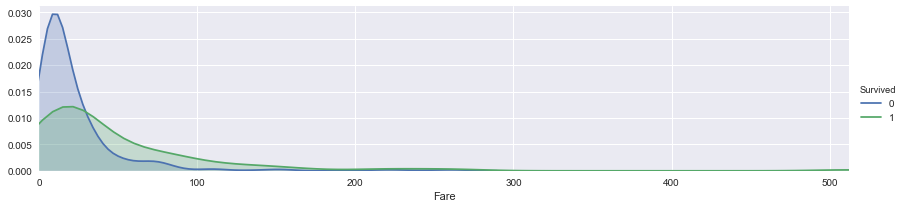

In [64]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0, 20)

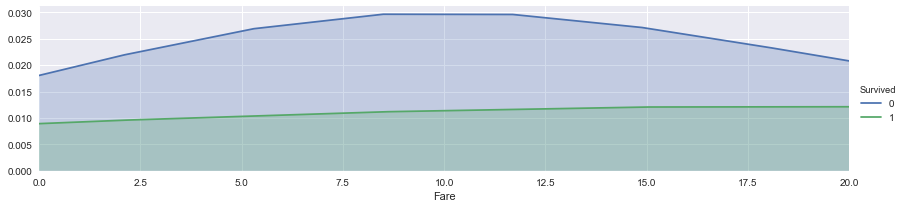

In [65]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

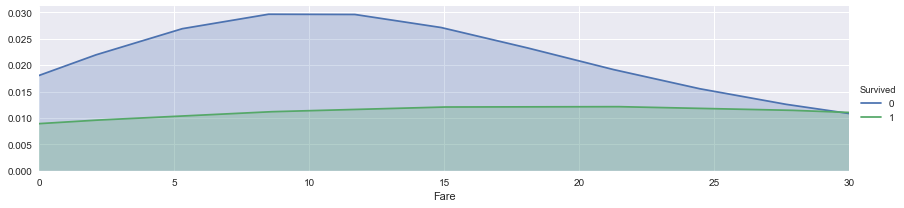

In [66]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

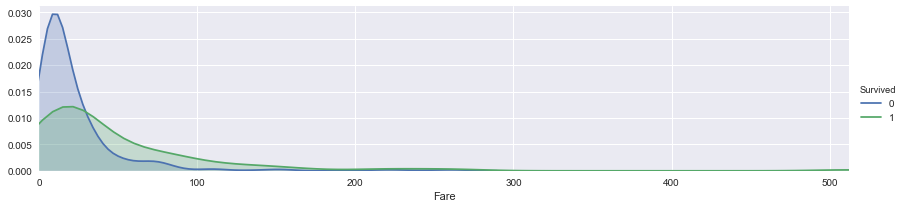

In [67]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [68]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [69]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [70]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title         FareBand  
0   0.0   NaN         0      3   (-0.001, 7.91]  
1   3.0   C85         1      0  (31.0, 512.329]  
2   1.0   NaN         0      1   (7.91, 14.454]  
3   3.0  C123         0      0  (31.0, 512.329]  
4   1.0   NaN         0      3   (7.91, 14.454]

In [71]:
train.drop('FareBand', axis=1, inplace=True)

### 4.7 Cabin

In [72]:
train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
D                  3
E101               3
C22 C26            3
F33                3
C83                2
C124               2
E25                2
B5                 2
B77                2
B57 B59 B63 B66    2
F G73              2
C126               2
C65                2
F4                 2
D20                2
C2                 2
C125               2
C52                2
E121               2
C123               2
E24                2
E67                2
B58 B60            2
D26                2
C68                2
B35                2
                  ..
D47                1
E31                1
D46                1
C62 C64            1
E38                1
A31                1
D37                1
D48                1
C54                1
B86                1
E17                1
D9                 1
A10                1
D10 D12            1
D11                1
B37                1
B41          

In [73]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))  

In [74]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    
train.head()    

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  
0   0.0    NaN         0      3  
1   3.0    0.8         1      0  
2   1.0    NaN         0      1  
3   3.0    0.8         0      0  
4   1.0    NaN         0      3

In [75]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

train.head()  

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  
0   0.0    2.0         0      3  
1   3.0    0.8         1      0  
2   1.0    2.0         0      1  
3   3.0    0.8         0      0  
4   1.0    2.0         0      3

### 4.8 FamilySize

In [76]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

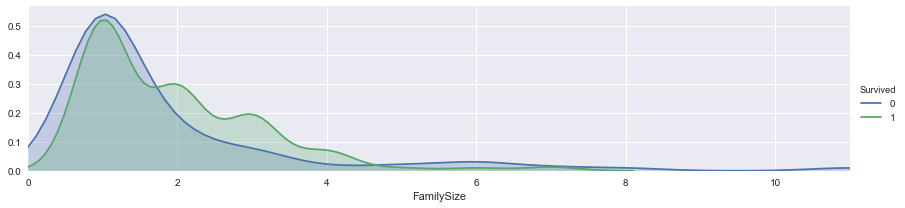

In [77]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [78]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [79]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      3         0.4  
1   3.0    0.8         1      0         0.4  
2   1.0    2.0         0      1         0.0  
3   3.0    0.8         0      0         0.4  
4   1.0    2.0         0      3         0.0

In [80]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      3         0.4  
1   3.0    0.8         1      0         0.4  
2   1.0    2.0         0      1         0.0  
3   3.0    0.8         0      0         0.4  
4   1.0    2.0         0      3         0.0

In [86]:
features_drop = ['Ticket']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

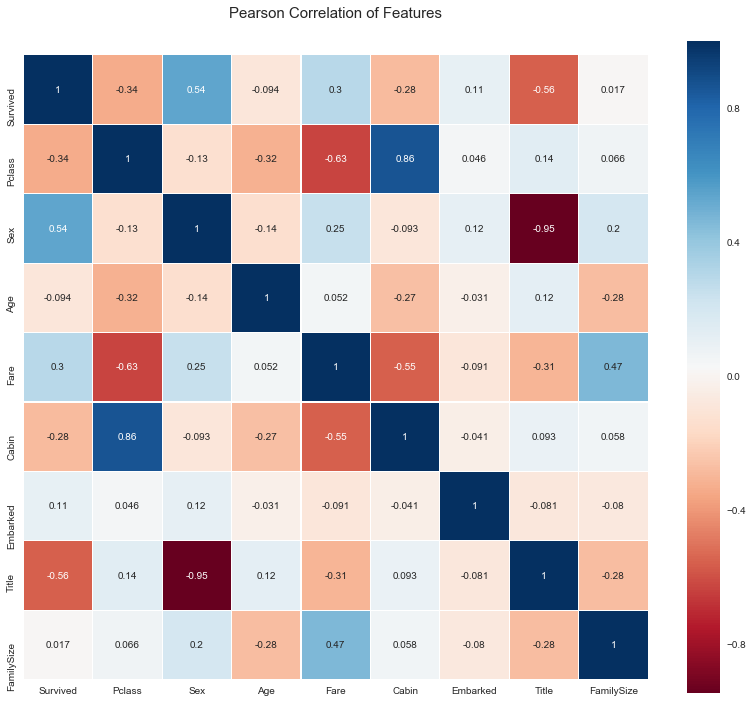

In [100]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(14,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True)

In [86]:
train.head()

Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0         0       3    0  1.0   0.0    2.0         0      3         0.4
1         1       1    1  3.0   3.0    0.8         1      0         0.4
2         1       3    1  1.0   1.0    2.0         0      1         0.0
3         1       1    1  2.0   3.0    0.8         0      0         0.4
4         0       3    0  2.0   1.0    2.0         0      3         0.0

In [87]:
test.head()

PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0          892       3    0  2.0   0.0    2.0         2      3         0.0
1          893       3    1  3.0   0.0    2.0         0      0         0.4
2          894       2    0  3.0   1.0    2.0         2      3         0.0
3          895       3    0  2.0   1.0    2.0         0      3         0.0
4          896       3    1  1.0   1.0    2.0         0      0         0.8

## 5. Modelling

In [118]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score



In [98]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
PassengerId  = test.PassengerId
test  = test.drop("PassengerId", axis=1).copy()

In [99]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
random_seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=random_seed)
X_train.shape, y_train.shape, X_test.shape

((712, 10), (712,), (179, 10))

### Logistic Regression

In [101]:
logreg = LogisticRegression()
param = {'penalty':['l1','l2'], 
        'C':[0.1, 0.5, 1.0,5.0]}

logreg.fit(X_train, y_train)
best_model = GridSearchCV(estimator=logreg, param_grid=param, cv=k_fold, n_jobs=1)
best_model.fit(X_train, y_train)
print('accuracy before Grid Search CV:%.4f'%logreg.score(X_train, y_train))
print('accuracy after Grid Search CV:%.4f'%best_model.score(X_train, y_train))

best_model.best_estimator_

accuracy before Grid Search CV:0.8230
accuracy after Grid Search CV:0.8357


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1         Sex     0.943589
5        Fare     0.423792
7    Embarked     0.331401
6       Cabin     0.314658
4       Parch    -0.085707
9  FamilySize    -0.230186
3       SibSp    -0.489757
2         Age    -0.528040
8       Title    -0.829972
0      Pclass    -0.830459

### SVM

In [103]:
parameters= {'kernel':['linear', 'rbf'], 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
model = svm.SVC()
model.fit(X_train, y_train)
best_model = GridSearchCV(model, parameters, cv=20, scoring='accuracy')
best_model.fit(X_train, y_train)
print('accuracy before Grid Search CV:%.4f'%model.score(X_train, y_train))
print('accuracy after Grid Search CV:%.4f'%best_model.score(X_train, y_train))

best_model.best_estimator_
# Y_pred = best_model.predict(X_test)

accuracy before Grid Search CV:0.8483
accuracy after Grid Search CV:0.8469


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### GradientBoosting

In [ ]:
clf = GradientBoostingClassifier(min_samples_split = 500, )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
# Y_pred = decision_tree.predict(X_test)
score = cross_val_score(decision_tree, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score.mean())

### XGBClassifier

In [132]:
# eval_set =  [(X_test, y_test)]
# model = XGBClassifier()
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
#           eval_set=eval_set,  verbose=True )
gbm = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 1000,
 max_depth= 2,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)

# y_pred = model.predict(X_test)
y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.89%


c:\programdata\anaconda3\envs\ai\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 79.89%


c:\programdata\anaconda3\envs\ai\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

### Ramdom Forest

In [126]:
random_forest = RandomForestClassifier(n_estimators=50, 
                                        max_features='sqrt', 
                                        oob_score=True,
                                        n_jobs=1)
#overfitting
parameters = {
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2']}
random_forest.fit(X_train, y_train)
best_model = GridSearchCV(random_forest, parameters, cv=10, scoring='accuracy')
best_model.fit(X_train, y_train)
print('accuracy before Grid Search CV:%.4f'%random_forest.score(X_train, y_train))
print('accuracy after Grid Search CV:%.4f'%best_model.score(X_train, y_train))

best_model.best_estimator_

# Y_pred = random_forest.predict(X_test)
# accuracy_score(y_test, Y_pred)

accuracy before Grid Search CV:0.9256
accuracy after Grid Search CV:0.9270


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

## 7. Testing

In [92]:
# parameters= {'kernel':['linear', 'rbf'], 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
# model = svm.SVC()
# model.fit(X_train, y_train)
# best_model = GridSearchCV(model, parameters, cv=20, scoring='accuracy')
# best_model.fit(X_train, y_train)
# print('accuracy before Grid Search CV:%.4f'%model.score(X_train, y_train))
# print('accuracy after Grid Search CV:%.4f'%best_model.score(X_train, y_train))


# prediction = best_model.predict(test)

accuracy before Grid Search CV:0.8469
accuracy after Grid Search CV:0.8778


In [99]:
eval_set =  [(X_test, y_test)] #auc
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
          eval_set=eval_set,  verbose=True )

prediction = model.predict(test)

[0]	validation_0-auc:0.839657
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.84058
[2]	validation_0-auc:0.840053
[3]	validation_0-auc:0.84058
[4]	validation_0-auc:0.840053
[5]	validation_0-auc:0.831752
[6]	validation_0-auc:0.831225
[7]	validation_0-auc:0.830632
[8]	validation_0-auc:0.830632
[9]	validation_0-auc:0.828195
[10]	validation_0-auc:0.828195
[11]	validation_0-auc:0.827668
Stopping. Best iteration:
[1]	validation_0-auc:0.84058



c:\programdata\anaconda3\envs\ai\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [97]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": prediction
    })
submission.to_csv('xgb.csv', index=False)

In [94]:
submission = pd.read_csv('svm2.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

## References

This notebook is created by learning from the following notebooks:

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
